In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot: xlabel='benign_0__mal_1', ylabel='count'>

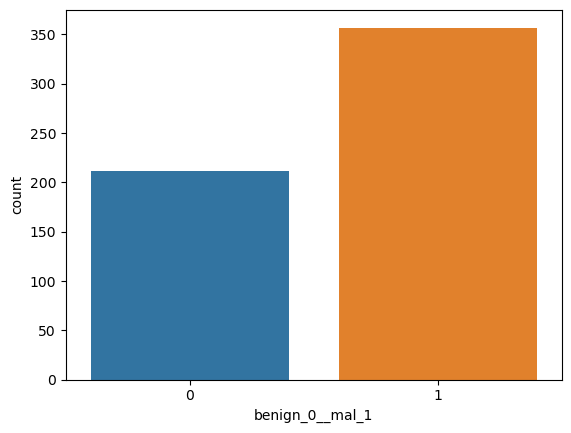

In [7]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot: >

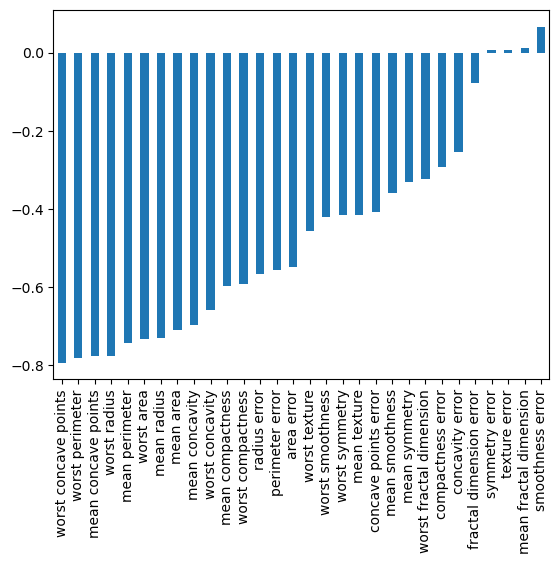

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot: >

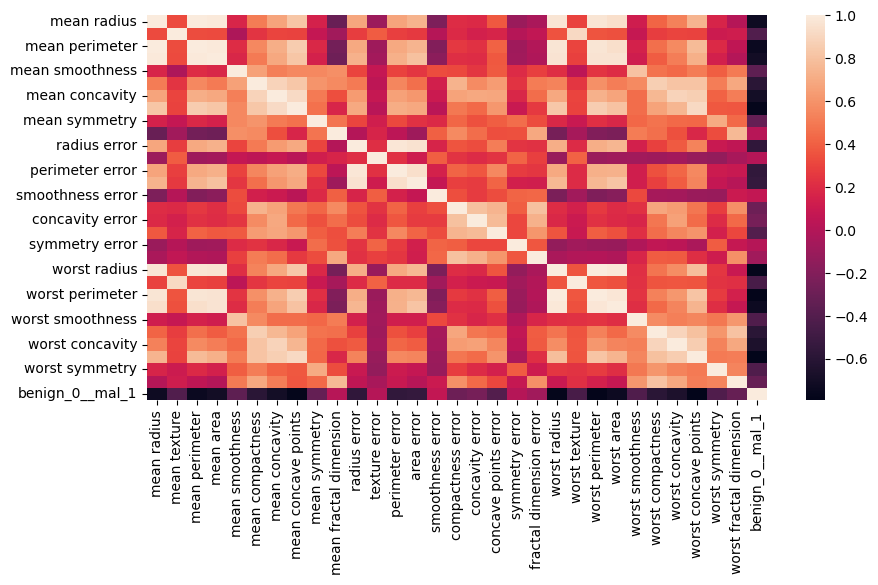

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

In [15]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
X_train.shape

(426, 30)

In [25]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#Because this is binary classification problem we chose sigmoid function
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 33ms/step - loss: 0.6779 - val_loss: 0.6633
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6450 - val_loss: 0.6256
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6002 - val_loss: 0.5731
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5448 - val_loss: 0.5142
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4886 - val_loss: 0.4535
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4307 - val_loss: 0.3953
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3797 - val_loss: 0.3423
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3341 - val_loss: 0.2993
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2962 - val_loss: 0.2638
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2649 - val_loss: 0.2352
Epoch 11

14/14 [==============================] - 0s 7ms/step - loss: 0.0477 - val_loss: 0.1055
Epoch 84/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0468 - val_loss: 0.1072
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0471 - val_loss: 0.1004
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0514 - val_loss: 0.1052
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0619 - val_loss: 0.1068
Epoch 88/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0503 - val_loss: 0.1075
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0509 - val_loss: 0.1042
Epoch 90/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0447 - val_loss: 0.1102
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0519 - val_loss: 0.1109
Epoch 92/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0522 - val_loss: 0.1033
Epoch 93/600


14/14 [==============================] - 0s 7ms/step - loss: 0.0340 - val_loss: 0.1196
Epoch 165/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0331 - val_loss: 0.1218
Epoch 166/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0380 - val_loss: 0.1114
Epoch 167/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.1297
Epoch 168/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0433 - val_loss: 0.1155
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0338 - val_loss: 0.1189
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0332 - val_loss: 0.1171
Epoch 171/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0368 - val_loss: 0.1083
Epoch 172/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0423 - val_loss: 0.1347
Epoch 173/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0436 - val_loss: 0.1108
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0281 - val_loss: 0.1406
Epoch 246/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0235 - val_loss: 0.1250
Epoch 247/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.1381
Epoch 248/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0271 - val_loss: 0.1310
Epoch 249/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0305 - val_loss: 0.1248
Epoch 250/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0248 - val_loss: 0.1275
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0252 - val_loss: 0.1240
Epoch 252/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0251 - val_loss: 0.1356
Epoch 253/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0233 - val_loss: 0.1201
Epoch 254/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: 0.1454
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0171 - val_loss: 0.1289
Epoch 327/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0181 - val_loss: 0.1531
Epoch 328/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0208 - val_loss: 0.1287
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0183 - val_loss: 0.1706
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.1436
Epoch 331/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.1320
Epoch 332/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0188 - val_loss: 0.1442
Epoch 333/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0150 - val_loss: 0.1320
Epoch 334/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0169 - val_loss: 0.1581
Epoch 335/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0184 - val_loss: 0.1305
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0113 - val_loss: 0.1617
Epoch 408/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0125 - val_loss: 0.1720
Epoch 409/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0116 - val_loss: 0.1545
Epoch 410/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0112 - val_loss: 0.2042
Epoch 411/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0141 - val_loss: 0.1494
Epoch 412/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0149 - val_loss: 0.2039
Epoch 413/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0129 - val_loss: 0.1498
Epoch 414/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0170 - val_loss: 0.2139
Epoch 415/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0162 - val_loss: 0.1464
Epoch 416/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0151 - val_loss: 0.2030
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0067 - val_loss: 0.1916
Epoch 489/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0072 - val_loss: 0.2047
Epoch 490/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0064 - val_loss: 0.1888
Epoch 491/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0065 - val_loss: 0.2009
Epoch 492/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0068 - val_loss: 0.1819
Epoch 493/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.2463
Epoch 494/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.2024
Epoch 495/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0068 - val_loss: 0.2025
Epoch 496/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 0.2003
Epoch 497/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.1936
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.2327
Epoch 570/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.2276
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.2300
Epoch 572/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.2374
Epoch 573/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.2293
Epoch 574/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.2308
Epoch 575/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 0.2234
Epoch 576/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.2547
Epoch 577/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.2150
Epoch 578/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0053 - val_loss: 0.2748
Epoc

<AxesSubplot: >

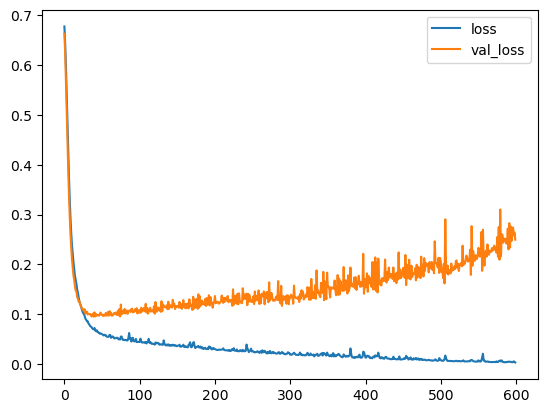

In [28]:
losses = pd.DataFrame(model.history.history)
losses.plot() #overfitting

In [29]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#Because this is binary classification problem we chose sigmoid function
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
#help(EarlyStopping)

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [34]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 26ms/step - loss: 0.6877 - val_loss: 0.6614
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6412 - val_loss: 0.6226
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6046 - val_loss: 0.5865
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5690 - val_loss: 0.5504
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5329 - val_loss: 0.5120
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4935 - val_loss: 0.4698
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4507 - val_loss: 0.4232
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4060 - val_loss: 0.3752
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3645 - val_loss: 0.3317
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3290 - val_loss: 0.2978
Epoch 11

14/14 [==============================] - 0s 8ms/step - loss: 0.0540 - val_loss: 0.0962
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0537 - val_loss: 0.0963
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0486 - val_loss: 0.0997
Epoch 85: early stopping


<AxesSubplot: >

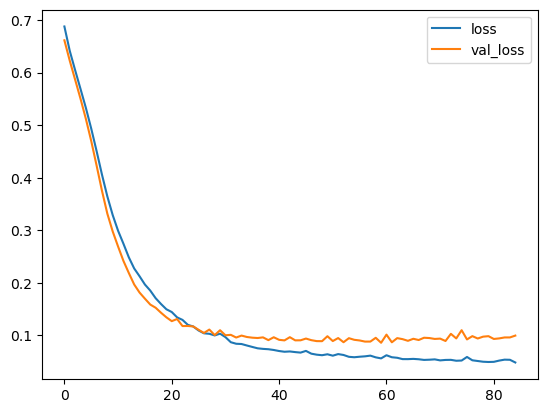

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#Because this is binary classification problem we chose sigmoid function
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 27ms/step - loss: 0.6995 - val_loss: 0.6601
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7085 - val_loss: 0.6437
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6690 - val_loss: 0.6267
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6464 - val_loss: 0.6074
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6161 - val_loss: 0.5866
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5964 - val_loss: 0.5629
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5871 - val_loss: 0.5364
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5608 - val_loss: 0.5050
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5402 - val_loss: 0.4761
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5240 - val_loss: 0.4492
Epoch 11

14/14 [==============================] - 0s 8ms/step - loss: 0.1085 - val_loss: 0.0997
Epoch 84/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1269 - val_loss: 0.1032
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1139 - val_loss: 0.0857
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1266 - val_loss: 0.0929
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1179 - val_loss: 0.0964
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1171 - val_loss: 0.0873
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1108 - val_loss: 0.0865
Epoch 90/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1052 - val_loss: 0.1022
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1388 - val_loss: 0.1004
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1338 - val_loss: 0.0800
Epoch 93/600


In [40]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot: >

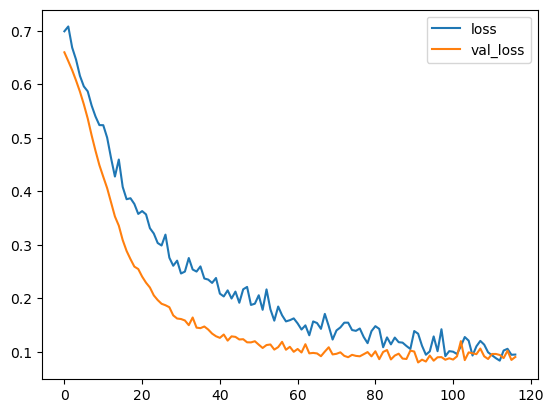

In [41]:
model_loss.plot()

In [48]:
classes_x = np.argmax(model.predict(X_test), axis=1)
classes_x

5/5 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



C:\Users\Kishiyev\anaconda3\envs\holden\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kishiyev\anaconda3\envs\holden\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kishiyev\anaconda3\envs\holden\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

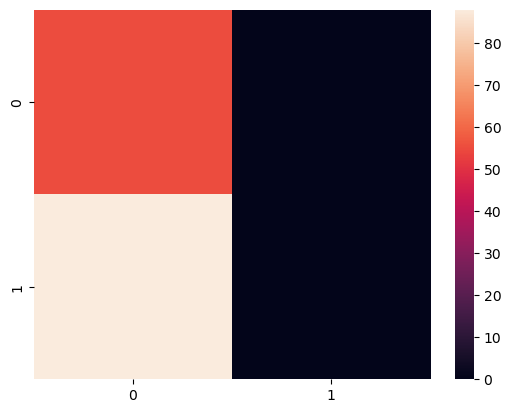

In [51]:
sns.heatmap(confusion_matrix(y_test, classes_x))

In [52]:
model.save('cancer.hfb5')

INFO:tensorflow:Assets written to: cancer.hfb5\assets
